# Explore the distibution of death years

In [7]:
import sqlite3 as sql
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

## Get the death dates (or years) from the SQLite database


In [8]:
### Define the path to the file (a string in a variable 'db_file')
db_file = 'Import_DBpedia_database_archiviste.sqlite'

In [9]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)    
# Le contenu de la variable: connexion
# cn

In [10]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT death_date 
FROM person p
order by death_date
"""

In [11]:
### Création du conteneur du résultat de la requête
try:
    cur = cn.cursor()
except Exception as e:
    print(e)    

In [12]:
### Exécuter la requête et récupérer le résultat
cur.execute(q1)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()
cn.close()

In [14]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de deces
print(len(r), '\n-----\n', type(r),  '\n-----\n', r[:5])

91 
-----
 <class 'list'> 
-----
 [('1855',), ('1859',), ('1868',), ('1872',), ('1877',)]


## Python control structures

Read and treat each element (e) of a list 
* A [Python list](https://datacarpentry.github.io/python-socialsci/02-basics.html#the-list)
* [*for* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-for-loop) (Datacarpentry tutorial)
* [*while* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-while-loop)
* [*if* statement](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-if-statement-and-variants)

In [15]:
### Result of SQL query: list of tuples
# five first elements
print(r[:5], '\n---')
# access the values
print(r[0], r[1], r[1][0])

[('1855',), ('1859',), ('1868',), ('1872',), ('1877',)] 
---
('1855',) ('1859',) 1859


In [16]:
# 'for' loop on the first five elements
for e in r[:5]:
    print(e[0])

1855
1859
1868
1872
1877


In [17]:
# 'while' loop on the first five elements
i = 0
while i < 5 :
    print(r[i][0])
    i += 1

1855
1859
1868
1872
1877


In [29]:
# 'while' loop on the first 20 elements
# adding an if condition
i = 0
while i < 20 :
    # modulus: returns the reminder
    if int(r[i][0]) % 5 == 0:
        print(r[i][0])
        i += 1
    else:
        i += 1    


1855
1885
1895
1905
1905


## Prepare the data to be plotted

In [32]:
### Create a new list of values, not tuples
# create an empty list named 'lr'
lr = []

# add (append) each element (the first part of it) to the list 'lr'.
for e in r:
    lr.append(int(e[0]))

print(lr[:5])

[1855, 1859, 1868, 1872, 1877]


In [34]:
### Test if all list elements are of type 'integer'
# Doc.: https://stackoverflow.com/questions/6009589/how-to-test-if-every-item-in-a-list-of-type-int
all(type(item) is int for item in lr)

True

In [36]:
### Extract the year from the date and convert value from string to integer
dt = '1457-08-02'
a = int(dt[:4]) ; a

1457

In [37]:
### Apply to the whole list:
# first, convert all values to string
# second, take only the first four characteurs, i.e. the year
# then convert to integer
lr = []
for e in r:
    lr.append(int((str(e[0]))[:4]))


print(lr[:5])    

[1855, 1859, 1868, 1872, 1877]


In [38]:
### Create a Pandas series (a particular list object)
slr = pd.Series(lr, name='Année')
print(slr[:2])

0    1855
1    1859
Name: Année, dtype: int64


In [39]:
slrg = slr.groupby(by=slr).size()
slrg.name='Année'
slrg.tail()

Année
2011    1
2013    1
2014    1
2016    1
2017    2
Name: Année, dtype: int64

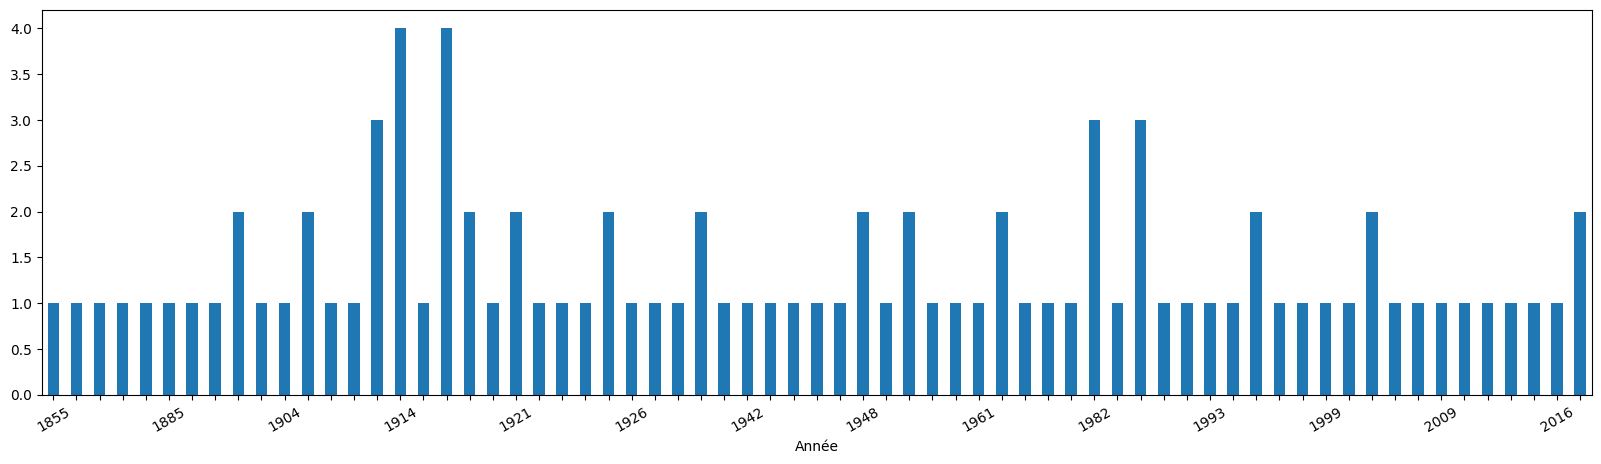

In [40]:
### Group by year and plot
# Beware : a lot of years are missing !
# Avoid this approach !

fig, ax = plt.subplots()



slrg.plot(kind='bar', figsize=(20, 5))

## specific xticks labels customisation
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=30)        
plt.show()

In [41]:

print (lr[:3], lr[-7:], 'Min: ' + str(min(lr)), 'Max: ' + str(max(lr)))


[1855, 1859, 1868] [2010, 2011, 2013, 2014, 2016, 2017, 2017] Min: 1855 Max: 2017


In [42]:
y_l = list(range(min(lr), max(lr) + 1, 1))
print(len(y_l),y_l[:7])

163 [1855, 1856, 1857, 1858, 1859, 1860, 1861]


In [62]:
### Count how many deaths there are per year
# Parse a list inside another list: can be slow for long lists !
# There are other methods, here we just want to illustrate the idea
y_r = []
for a in y_l:
    # initialize the counter for each year
    n = 0    
    for v in lr:        
        if v == a:
            n += 1
        else:
            pass    
    y_r.append([a,n])
print(y_r[:10])  

[[1855, 1], [1856, 0], [1857, 0], [1858, 0], [1859, 1], [1860, 0], [1861, 0], [1862, 0], [1863, 0], [1864, 0]]


In [45]:
### Create a Pandas dataframe (a kind of SQL table)
df_y_r = pd.DataFrame(y_r, columns=['year', 'number'])
df_y_r.tail(10)

,year,number
153,2008,0
154,2009,1
155,2010,1
156,2011,1
157,2012,0
158,2013,1
159,2014,1
160,2015,0
161,2016,1
162,2017,2


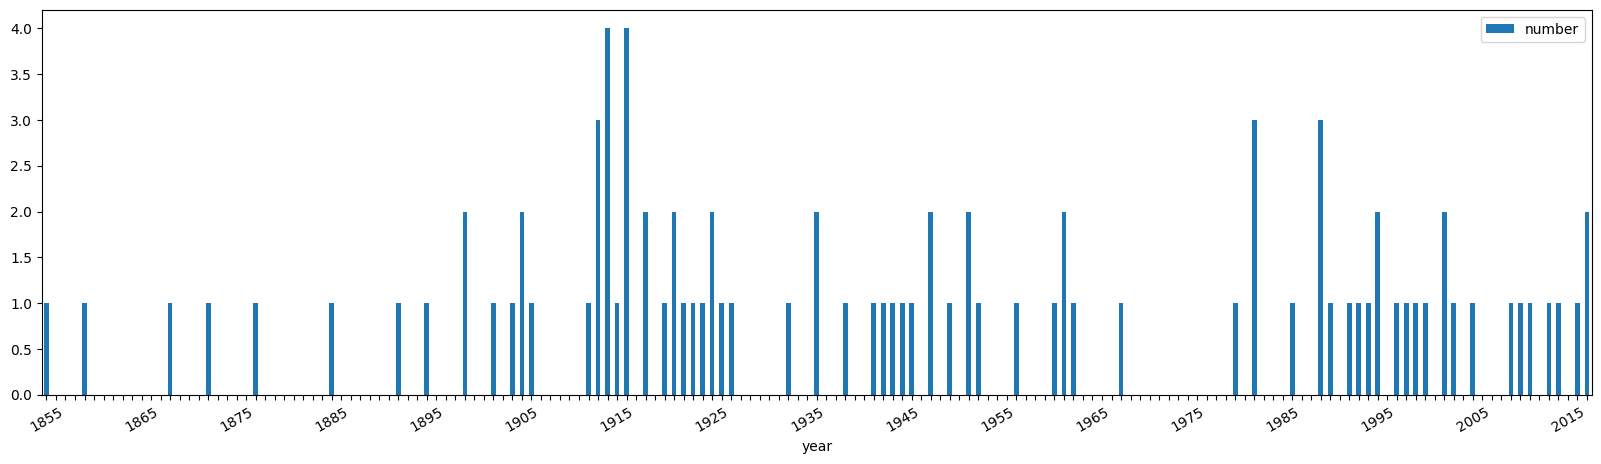

In [46]:
### Group by year and plot


fig, ax = plt.subplots()

df_y_r.plot(x='year', y='number',kind='bar', figsize=(20, 5), ax=ax)

## specific xticks labels customisation
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelsize=10,  rotation=30)
plt.show()

## Plot with the Plotly library

In [47]:
# The original series
print(slrg.head(), slrg.tail())

Année
1855    1
1859    1
1868    1
1872    1
1877    1
Name: Année, dtype: int64 Année
2011    1
2013    1
2014    1
2016    1
2017    2
Name: Année, dtype: int64


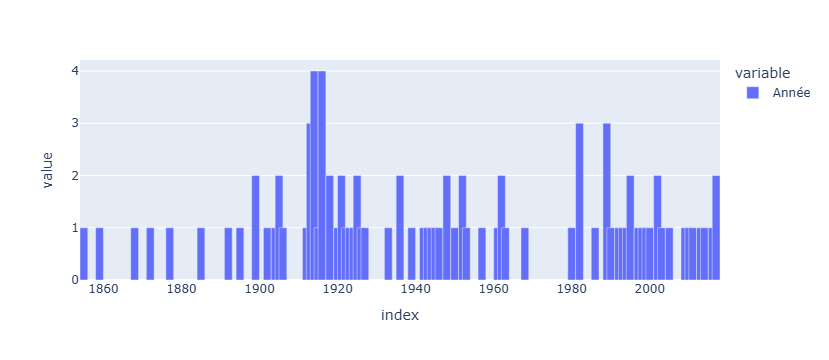

In [55]:
### Use a different plotting library: Plotly Express
# Observe the default behaviour of the library

fig = px.bar(slrg)
fig.update_traces(width=2)
fig.show()

In [56]:
type(slrg), slrg.tail()

(pandas.core.series.Series,
 Année
 2011    1
 2013    1
 2014    1
 2016    1
 2017    2
 Name: Année, dtype: int64)

In [57]:
df_slrg = slrg.reset_index(name='Effectif')
df_slrg.tail(10)

,Année,Effectif
57,2002,2
58,2003,1
59,2005,1
60,2009,1
61,2010,1
62,2011,1
63,2013,1
64,2014,1
65,2016,1
66,2017,2


In [58]:
### Créer une liste d'années pour séparer en périodes de 3 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_3 = list(range(1351, 2002, 3))
print(l_3[:5],l_3[-5:])

[1351, 1354, 1357, 1360, 1363] [1987, 1990, 1993, 1996, 1999]


In [59]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

df_slrg['Périodes'] = pd.cut(df_slrg.Année, l_3, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
df_slrg['Périodes'] = df_slrg['Périodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
df_slrg.head(3)

,Année,Effectif,Périodes
0,1855,1,1855-1857
1,1859,1,1858-1860
2,1868,1,1867-1869


In [65]:
### compter les décès par périodes de 3 ans
df_slrg[['Périodes','Effectif']].groupby(by='Périodes', observed=True).sum().head()

,Effectif
Périodes,
1855-1857,1
1858-1860,1
1867-1869,1
1870-1872,1
1876-1878,1


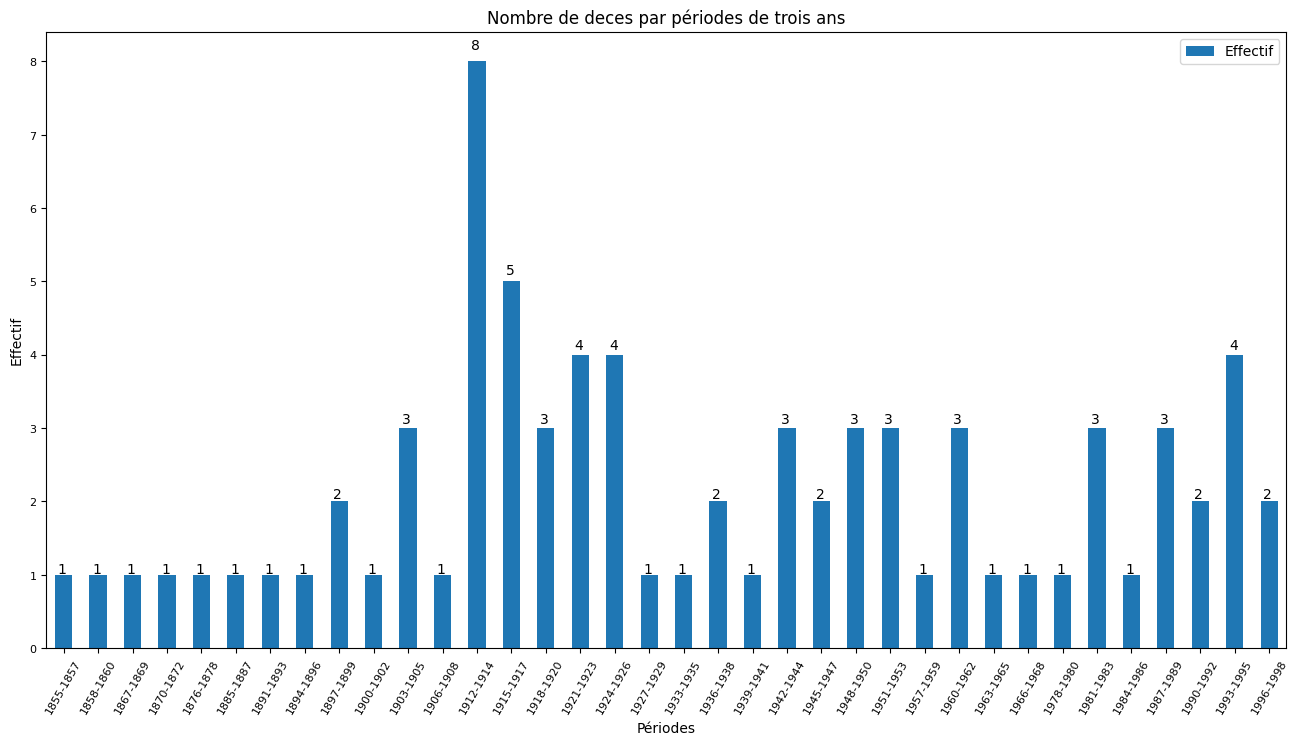

In [72]:
g_df = df_slrg[['Périodes','Effectif']].groupby(by='Périodes', observed=True).sum()

ax = g_df.plot(kind='bar',rot=60, fontsize=8, figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.08 , p.get_height() * 1.02))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de deces par périodes de trois ans')
plt.savefig('pictures/deces_3ans.png')
plt.show()

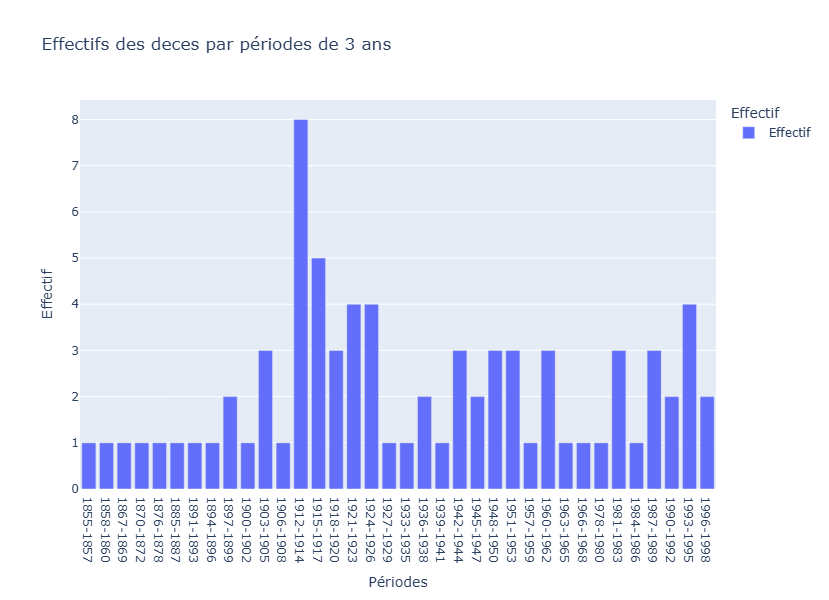

In [74]:
### Use a different plotting library


fig = px.bar(g_df, 
             # https://plotly.com/python/figure-labels/
             title='Effectifs des deces par périodes de 3 ans',
             labels={'periodes':'Période',
                     'value':'Effectif',
                     'variable':'Effectif'},
                 width=1200, height=600)
fig.write_html("pictures/deces_3ans.html")
fig.show()